<a href="https://colab.research.google.com/github/mskaa3/ankiety/blob/main/ankiety1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as stats
from scipy.stats import beta
from statsmodels.stats.proportion import proportion_confint
from tqdm import tqdm
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.stats.proportion as smp


# Zadanie 1


## Podpunkt 1

In [2]:
df = pd.read_csv('/content/ankieta.csv', sep=';', encoding='latin2')

In [3]:
print(df.head())

  DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK
0    IT     2      Nie      1     -2      1    M    64
1    IT     2      Nie      0     -2     -2    M    67
2    IT     2      Nie      1      2      2    M    65
3    IT     2      Nie     -1     -2     -2    K    68
4    IT     3      Tak      1      2     -1    K    65


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB
None


In [5]:
print(df.describe())

            STAŻ       PYT_1       PYT_2       PYT_3        WIEK
count  200.00000  200.000000  200.000000  200.000000  200.000000
mean     1.89000    0.565000    0.210000    0.350000   44.005000
std      0.53791    1.063688    1.908958    1.721137    9.704942
min      1.00000   -2.000000   -2.000000   -2.000000   25.000000
25%      2.00000    0.000000   -2.000000   -2.000000   38.000000
50%      2.00000    1.000000    2.000000    1.000000   42.000000
75%      2.00000    1.000000    2.000000    2.000000   49.250000
max      3.00000    2.000000    2.000000    2.000000   70.000000


In [6]:
print(df.isnull().any())

DZIAŁ       False
STAŻ        False
CZY_KIER    False
PYT_1       False
PYT_2       False
PYT_3       False
PŁEĆ        False
WIEK        False
dtype: bool


 Dane zawierają 200 rekordów i 8 opicujących je kolumn. 3 z cech przyjmują wartości numeryczne ze zbioru {-2,-1,0,1,2}, jedna ze zbioru {1,2,3}, a kolejna z zakresu [25,70]. Pozostałe cechy to cechy kategoryczne. W danych nie występują braki.

## Podpunkt 2

In [7]:
df['WIEK_KAT'] = pd.cut(df['WIEK'],
                        bins=[0, 35, 45, 55, float('inf')],
                        labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'],
                        right=True)
print(df.head())

  DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK        WIEK_KAT
0    IT     2      Nie      1     -2      1    M    64  powyżej 55 lat
1    IT     2      Nie      0     -2     -2    M    67  powyżej 55 lat
2    IT     2      Nie      1      2      2    M    65  powyżej 55 lat
3    IT     2      Nie     -1     -2     -2    K    68  powyżej 55 lat
4    IT     3      Tak      1      2     -1    K    65  powyżej 55 lat


## Podpunkt 3

In [8]:
columns = df.columns.to_list()
print(columns)

['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PYT_1', 'PYT_2', 'PYT_3', 'PŁEĆ', 'WIEK', 'WIEK_KAT']


In [9]:
for col in columns:
  if 'PYT' not in col and col!='WIEK':
      print(f"\nTablica liczności dla zmiennej: {col}")
      print(df[col].value_counts())


Tablica liczności dla zmiennej: DZIAŁ
DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Tablica liczności dla zmiennej: STAŻ
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64

Tablica liczności dla zmiennej: CZY_KIER
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

Tablica liczności dla zmiennej: PŁEĆ
PŁEĆ
M    129
K     71
Name: count, dtype: int64

Tablica liczności dla zmiennej: WIEK_KAT
WIEK_KAT
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: count, dtype: int64


1) DZIAŁ - najbardziej liczną grupą badanych są pracownicy Działu Produktowego (98 osób), następnie Działu Marketingu (45 osób). W dziale technologii informacyjnych i zasobów ludzkich pracuje najmniej osób (odpowiednio 26 i 31)

2) STAŻ - zdecydowana większość badancyh pracowników (70%) ma staż pracy wynoszący od roku do trzech, natomiast drugą najliczniejszą grupą są osoby ze stażem wynoszącym poniżej roku. Najmniej liczną grupą są doświadczeni pracownicy (powyżej 3 lat doświadczenia), których jest zaledwie 19.

3) CZY_KIER - pośród badanych tylko 27 osób należy do kadry kierowniczej, stanowiąc 13,5% wszystkich biorących udział w ankiecie

4) PŁEĆ - wśród badanych osób przeważają mężczyźni (ponad 60%)

5) WIEK_KAT - nieco ponad połowa osób jest w wieku 36-45 lat, prawie 25% stanowią osoby w wieku 46-55 lat, natomiast grupy poniżej 25 i ponad 55 lat stanowią w przybliżeniu 12.5% całej badanej grupy

## Podpunkt 4

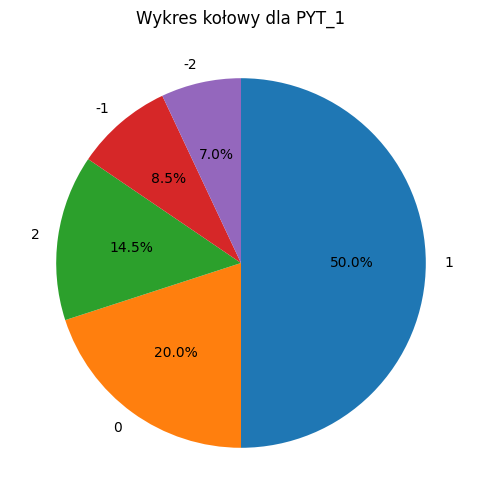

<ipython-input-10-6ad990864ed9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette="pastel")


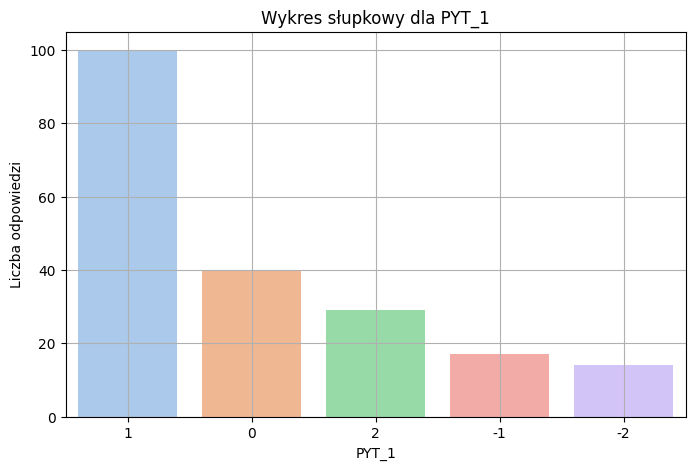

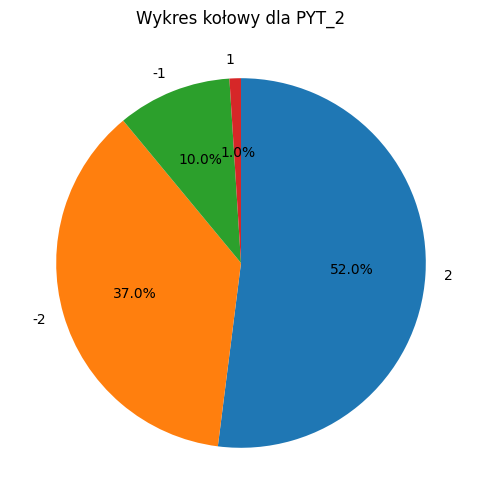

<ipython-input-10-6ad990864ed9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette="pastel")


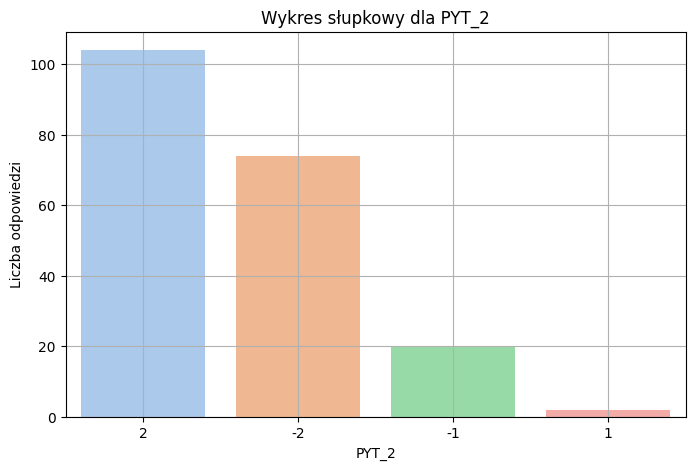

In [10]:
for val in ['PYT_1', 'PYT_2']:
    counts = df[val].value_counts()

    plt.figure(figsize=(6, 6))
    counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Wykres kołowy dla {val}')
    plt.ylabel('')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette="pastel")
    plt.title(f'Wykres słupkowy dla {val}')
    plt.xlabel(val)
    plt.ylabel('Liczba odpowiedzi')
    plt.grid()
    plt.show()

1) PYT_1 - wyniki reprezentują odpowiedzi na pytanie *Jak bardzo zgadzasz się ze stwierdzeniem, ze firma zapewnia odpowiednie wsparcie i materiały umożliwiające skuteczne wykorzystanie w praktyce wiedzy zdobytej w trakcie szkoleń?*, gdzie -2 oznacza, że osoba zdecydowanie się nie zgadza, a 2 że zdecydowanie się zgadza. Na wykresach można zauważyć, że większość odpowiedzi jest pozytywna bądź neutralna, a negatywne odpowiedzi stanowią zdecydowaną mniejszość - odpowiedzi -2 udzieliło tylko 7% osób, odpowiedzi -1 tylko 8.5 %. Połowa badanych wyraziła zadowolenie udzielając odpowiedzi 1, a 14.5% osób odpowiedziało, że zgadza się zdecydowanie. Osób które nie mają zdania było 40, stanowiąc 20% badanych.

2) PYT_2 - wyniki reprezentują odpowiedzi na pytanie *Jak bardzo zgadzasz się ze stwierdzeniem, że firma oferuje szkolenia dostosowane do twoich potrzeb, wspierając twój rozwój zawodowy i szanse na awans?*  z analogiczną skalą odpowiedzi jak w PYT_1. W tym wypadku odpowiedzi były znacznie bardziej skrajne, ponieważ ponad 50% wyraziło zdecydowaną zgodę ze stwierdzeniem, a jednocześnie prawie 40% zdecydowanie się z nim nie zgodziło. Nikt nie zaznaczył odpowiedzi neutralnej, 10% osób odpowiedziało, ze się nie zgadza, a tylko 1%, że się zgadza. Możliwym jest, że takie wyniki są spobodowane innymi czynnikami które nie są tu zareprezentowane, przykładowo, możliwe że konkretne działy oferują różne typy szkoleń które odpowiadają pracownikom, natomiast inne w zupełności tego nie robią.

## Podpunkt 5

In [11]:
print(pd.crosstab(df['DZIAŁ'],df['PYT_1'], margins=True))

PYT_1  -2  -1   0    1   2  All
DZIAŁ                          
HR      2   2   5   19   3   31
IT      0   2   4   15   5   26
MK      3   3  14   15  10   45
PD      9  10  17   51  11   98
All    14  17  40  100  29  200


Dział produktowy, dział zasobów ludzkich oraz IT mają największy udział pozytwynych odpowiedzi. W dziale IT pojawia się też najmniej negatywnych odpowiedzi. Natomiast dział marketingu ma podobną ilość odpowiedzi 0,1 i 2 co sugeruje większe niezdecydowania lub mniej wyraziste postawy.

In [12]:
print(pd.crosstab(df['STAŻ'],df['PYT_1'], margins=True))

PYT_1  -2  -1   0    1   2  All
STAŻ                           
1       5   6   8   19   3   41
2       5  10  26   75  24  140
3       4   1   6    6   2   19
All    14  17  40  100  29  200


Wśród grup o bardzo krótkim i bardzo długim stażu zdania są najbardziej podzielone, podczas gdy pracownicy o stażu od roku do 3 dlat, dużo częściej zgadzają się ze stwierdzeniem z pyt_1. Jako, ze pytanie tyczy się wsparcia, materiałów i wykorzystania wiedzy ze szkoleń, możliwą przyczyną takiego rozkładu odpowiedzi może być fakt, że osoby z małym doświadczeniem nie czują się wystarczająco wspierane podczas wdrażania się w działanie firmy, bądź czują się zagubione podczas nauki, natomiast starsze stażem osoby mogą mieć dużo większe wymagania, jako że opanowali już podstawy.  

In [13]:
print(pd.crosstab( df['CZY_KIER'],df['PYT_1'], margins=True))

PYT_1     -2  -1   0    1   2  All
CZY_KIER                          
Nie       10  14  34   88  27  173
Tak        4   3   6   12   2   27
All       14  17  40  100  29  200


Wśród grupy kierowniczej, procentowo pojawia się więcej negatywnych odpowiedzi oraz mniej zdecydowanie pozytywnych. Rozkład jest bardziej rozproszony, co może wynikać z większych wymagań związanych z doświadczeniem i zakresem wykonywanej pracy tej grupy. Osoby poza stanowiskami kierowniczymi częściej oddawały pozytywne odpowiedzi.

In [14]:
print(pd.crosstab( df['WIEK_KAT'],df['PYT_1'], margins=True))

PYT_1           -2  -1   0    1   2  All
WIEK_KAT                                
do 35 lat        1   6   3   13   3   26
36-45 lat       11   7  24   50  12  104
46-55 lat        2   1   5   25  12   45
powyżej 55 lat   0   3   8   12   2   25
All             14  17  40  100  29  200


Grupą oddającą najwięcej pozytywnych odpowiedzi jest grupa 46-55 lat, oraz grupa najmłodsza do lat 35. Dla grupy 36-45 lat mimo dość sporej liczby odpowiedzi 'zgadzam się', mamy również dużą grupę bez zdania, jak i sporą grupę zdecydowanie nie zgadzających się. Wśród najstarszej grupy nie pojawiły się odpowiedzi skrajnie negatywne, a najczęściej występowała zgoda i brak zdania.  

In [15]:
print(pd.crosstab( df['PŁEĆ'],df['PYT_1'], margins=True))

PYT_1  -2  -1   0    1   2  All
PŁEĆ                           
K       3   7  14   36  11   71
M      11  10  26   64  18  129
All    14  17  40  100  29  200


Zarówno wśród kobiet jak i wśród mężczyzn odsetek odpowiedzi pozytywnych (1 i 2) wynosi koło 65%, podczas gdy negatywne odpowiedzi(-1 i -2) w grupach stanowią koło 15%. Analogiczna sytuacja zachodzi dla odpowiedzi neutralnych, więc ogólnie rozkład odpowiedzi między płciami jest bardzo zbliżony.

## Podpunkt 6

In [16]:
print(pd.crosstab(df['PYT_2'],df['PYT_3'], margins=True))

PYT_3  -2  -1   1   2  All
PYT_2                     
-2     49  16   5   4   74
-1      3   6  10   1   20
1       0   0   2   0    2
2       0   8  15  81  104
All    52  30  32  86  200


Odpowiedzi na pytanie 2 oraz 3 są ze sobą mocno skorelowane -> pozywna lub negatywna ocena w ramach jednego pytania jest powiązana z pdoobną oceną dla drugiego. Możemy jednak zauważyć lekkie 'przesunięcie się' ku bardziej pozytywnym ocenom po szkoleniach (pyt_3), co może świadczyć o skuteczności zaproponowanych szkoleń

In [17]:
print(df[['PYT_2', 'PYT_3']].corr(method='pearson'))

          PYT_2     PYT_3
PYT_2  1.000000  0.806479
PYT_3  0.806479  1.000000


Zgodnie z zauważoną zależnością, możemy zobaczyć że pyt_3 i pyt_2 są ze sobą skorelowane, ponieważ współczynnik korelacji Pearsona wynosi około 0.8, oznaczając silną dodatnią liniową zależność

## Podpunkt 7

In [18]:
df['CZY_ZADOW'] = df['PYT_2'].map({
    -2: 0,
    -1: 0,
    0: 0,
    1: 1,
    2: 1
})
print(df.head())

  DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK        WIEK_KAT  \
0    IT     2      Nie      1     -2      1    M    64  powyżej 55 lat   
1    IT     2      Nie      0     -2     -2    M    67  powyżej 55 lat   
2    IT     2      Nie      1      2      2    M    65  powyżej 55 lat   
3    IT     2      Nie     -1     -2     -2    K    68  powyżej 55 lat   
4    IT     3      Tak      1      2     -1    K    65  powyżej 55 lat   

   CZY_ZADOW  
0          0  
1          0  
2          1  
3          0  
4          1  


## Podpunkt 8

<Figure size 800x600 with 0 Axes>

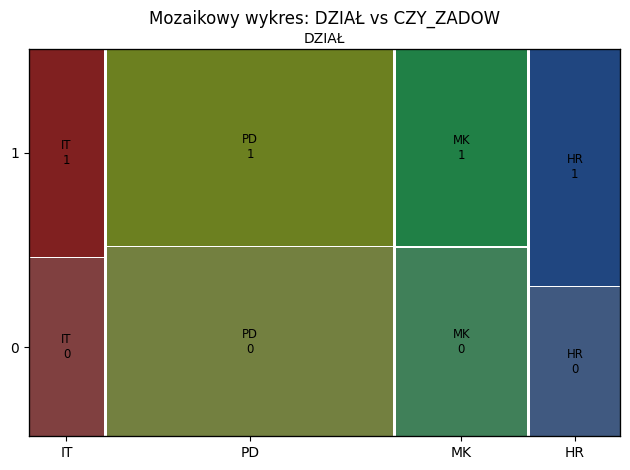

<Figure size 800x600 with 0 Axes>

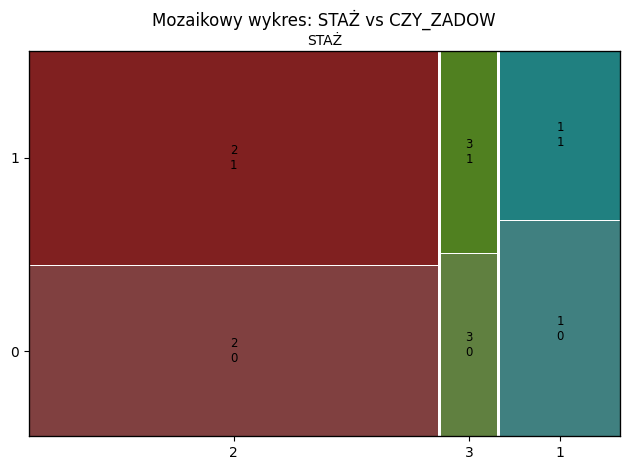

<Figure size 800x600 with 0 Axes>

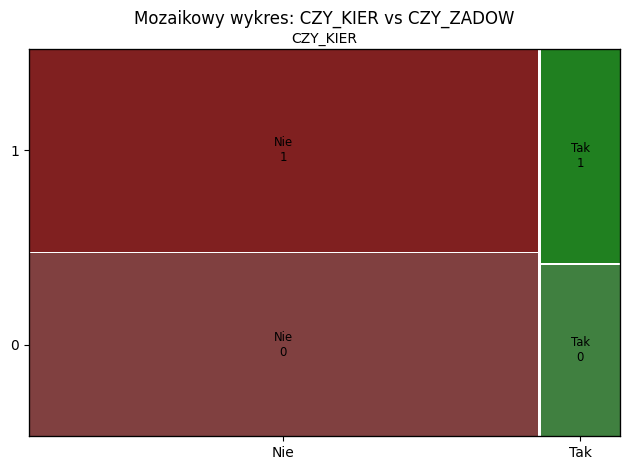

<Figure size 800x600 with 0 Axes>

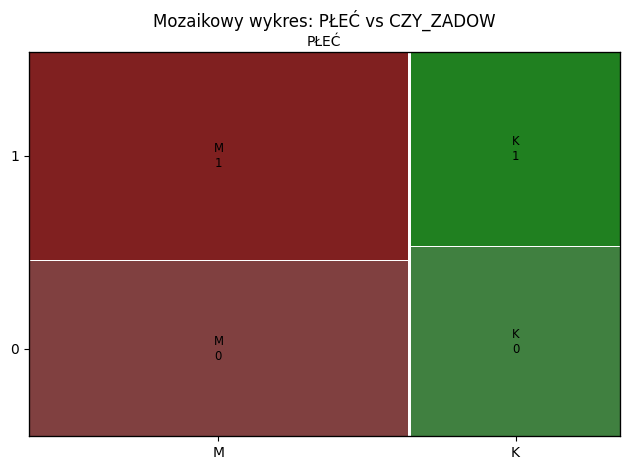

<Figure size 800x600 with 0 Axes>

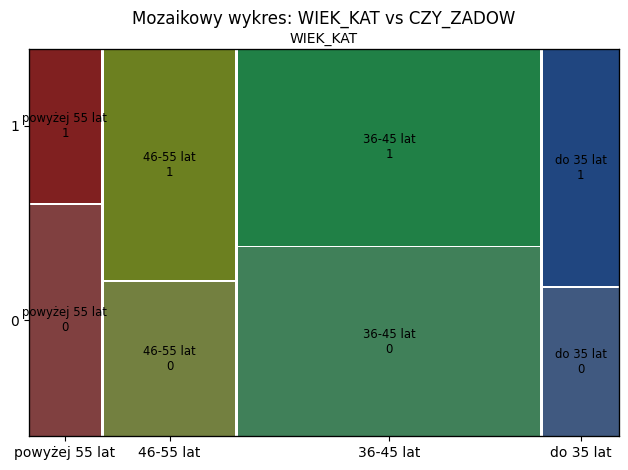

In [19]:
values = ['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PŁEĆ', 'WIEK_KAT']

for val in values:
    plt.figure(figsize=(8, 6))
    mosaic(df, [val, 'CZY_ZADOW'])
    plt.title(f'Mozaikowy wykres: {val} vs CZY_ZADOW')
    plt.xlabel(val)
    plt.ylabel('CZY_ZADOW')
    plt.tight_layout()
    plt.show()

Dla zmiennych CZY_KIER oraz PŁEĆ sparowanych ze zmienną CZY_ZADOW wykresy mozaikowe pokazują zbliżone rozkłady. Dla zmiennej DZIAŁ możemy zaobserwować, że nieco bardziej zadowoleni są pracownicy działów IT oraz HR, co jest zgodne ze stereotypami dotyczącymi tych zawodów (na przykład lepsze zarobki, większe szanse na rozwój i awans, bardziej elastyczna praca). Wykres przedstawiający zależność stażu i zadowolenia pokazuje tendencję do wzrostu zadowolenia wraz z długością pracy - osoby z najkrótszym stażem są zdecydowanie mniej zadowolone w porównaniu do grup z ponad rocznym stażem. Wyniki grup z ponad rocznym stażem różnią się nieznacznie. Największe różnice w zadowoleniu widać natomiast dla różnych kategorii wiekowych. Najbardziej zadowolone są osoby do lat 35 oraz w przedziale 46-55, następnie osoby między 36 a 45 rokiem życia, a najmniej zadowolone są osoby najstarsze. Może to być związane na przykład z wypaleniem zawodowym.

# Zadanie 2

Dla całej grupy:

In [20]:
pyt_1_counts = df['PYT_1'].value_counts(normalize=True) * 100
print(pyt_1_counts)

PYT_1
 1    50.0
 0    20.0
 2    14.5
-1     8.5
-2     7.0
Name: proportion, dtype: float64


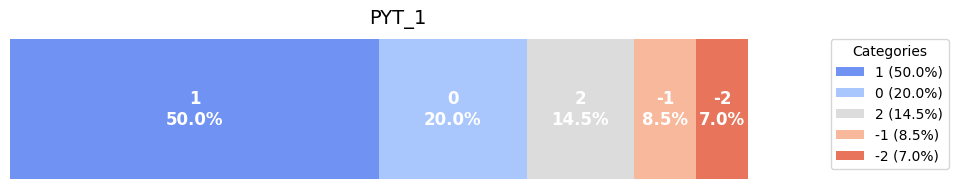

In [21]:
colors = sns.color_palette("coolwarm", len(pyt_1_counts))

fig, ax = plt.subplots(figsize=(10, 2))


start = 0

for (category, percentage), color in zip(pyt_1_counts.items(), colors):
    ax.barh(y=0, width=percentage, left=start, color=color, label=f"{category} ({percentage:.1f}%)")
    plt.text(start + percentage / 2, 0, f"{category}\n{percentage:.1f}%",
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    start += percentage
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.title("PYT_1", fontsize=14)


plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Połowa badanych zgadzała się ze stwierdzeniem w pytaniu 1, 20% zaznaczyło brak zdania, 14.5% zdecydowanie się zgadzało. Natomiast nie zgadzało się zaledwie 8.5% a odpowiedz zdecydowanie się nie zgadzam zaznaczyło zaledwie 7% badanych. Ogólnie, większa część odpowiedzi jest pozytywna bądź neutralna niż negatywna.

W zależności od grupy CZY_KIER

In [22]:
pyt_1_counts_nie = df[df['CZY_KIER'] == 'Nie']['PYT_1'].value_counts(normalize=True) * 100
pyt_1_counts_tak = df[df['CZY_KIER'] == 'Tak']['PYT_1'].value_counts(normalize=True) * 100

In [23]:
comparison_df = pd.DataFrame({
    'Nie': pyt_1_counts_nie,
    'Tak': pyt_1_counts_tak
})
print(comparison_df)

             Nie        Tak
PYT_1                      
-2      5.780347  14.814815
-1      8.092486  11.111111
 0     19.653179  22.222222
 1     50.867052  44.444444
 2     15.606936   7.407407


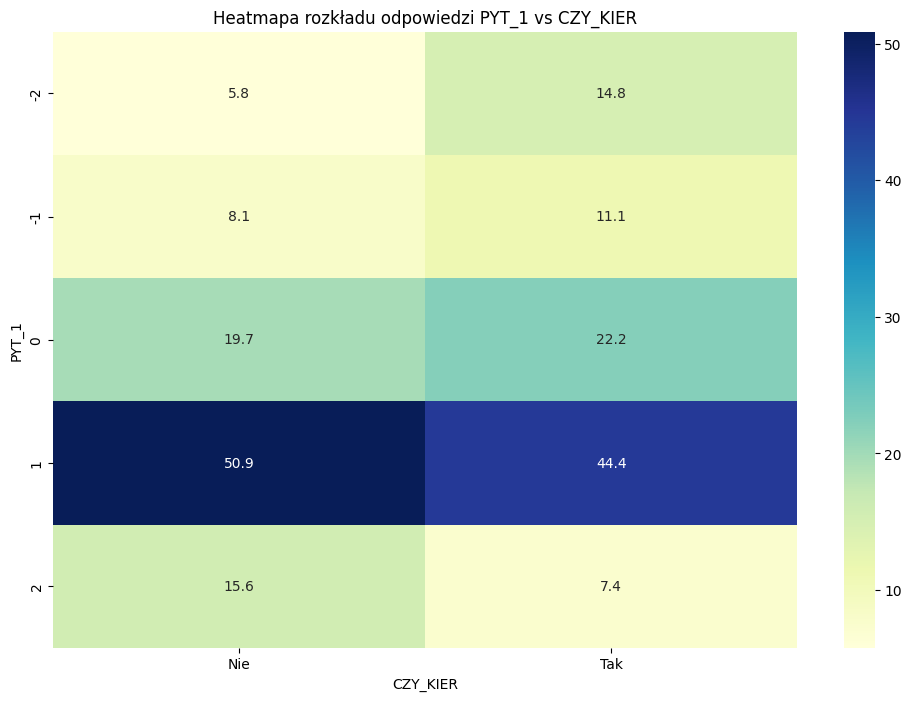

In [24]:

plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Heatmapa rozkładu odpowiedzi PYT_1 vs CZY_KIER')
plt.xlabel('CZY_KIER')
plt.ylabel('PYT_1')
plt.show()


Dla obu grup tendencja jest podobna, czyli blisko 50% osob wyrażało zgodę z twierdzeniem, oraz około 20% nie wyraziło zdania. Największą różnicę możemy zauważyć dla skrajnych odpowiedzi (2 i -2), gdzie dla grupy kierowniczej mamy 14.8% osób zdecydowanie się nie zgadzających, natomiast wśród grupy poza stanowiskami kierowniczymi jest to zaledwie 5.8% . W tej grupie zdecydowanie częściej udzielono odpowiedzi zdecydowanie się zgadzam (15.6%) niż w grupie keirowniczej (7.4%). Ta różnica może być spowodowana na przykład znacznie wyższymi oczekiwaniami grupy kierowniczej

# Zadanie 3

```numpy.random.choice(a, size=None, replace=True, p=None)```

Funkcja numpy.random.choice służy do losowego wyboru elementów z tablicy/listy

a – liczba lub lista elementów (jeśli liczba, to losowanie odbywa sie z zakresu 0 do a-1)

size - sample_size, ile elementów wylosować

replace -True/False, czyli czy losować z powtórzeniami.

p - prawdopodobieństwo losowania dla każdego elementu (musi mieć taką samą długość jak a)

In [25]:
sample_size = int(len(df) * 0.1)

sample_with_replacement = df.iloc[np.random.choice(df.index, size=sample_size, replace=True)]
sample_without_replacement = df.iloc[np.random.choice(df.index, size=sample_size, replace=False)]


In [26]:
print(sample_with_replacement.index)

Index([ 35, 172, 116,  18, 101,  39,  93, 132,  89,  39, 130,   7, 196,   6,
        68, 145, 117,  83,  64,  71],
      dtype='int64')


In [27]:
print(sample_with_replacement.index.duplicated().any())

True


In [28]:
print(sample_without_replacement.index)

Index([ 80, 185, 158,  10, 100, 108, 113, 155,  58, 131, 164, 106, 197,  52,
       171, 192,  92, 151, 130,   8],
      dtype='int64')


In [29]:
print(sample_without_replacement.index.duplicated().any())

False


Dla losowanie ze zwracaniem, możemy otrzymać zduplikowane indeksy.

# Zadanie 4

In [30]:
def symulate_bernoulii(n, p, size=1000):
    res = []
    for _ in range(size):
        success = sum(1 if np.random.rand() < p else 0 for _ in range(n))
        res.append(success)
    return np.array(res)


In [31]:
n = 100
p = 0.3
size = 10000
results = symulate_bernoulii(n, p, size)


In [32]:
theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)

empirical_mean = np.mean(results)
empirical_variance = np.var(results)

print(f"Teoretyczna średnia: {theoretical_mean:.2f}, Empiryczna średnia: {empirical_mean:.2f}")
print(f"Teoretyczna wariancja: {theoretical_variance:.2f}, Empiryczna wariancja: {empirical_variance:.2f}")


Teoretyczna średnia: 30.00, Empiryczna średnia: 30.02
Teoretyczna wariancja: 21.00, Empiryczna wariancja: 21.90


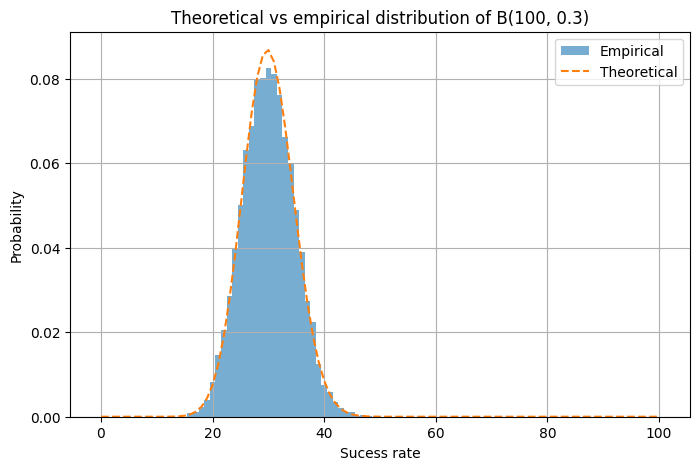

In [33]:

plt.figure(figsize=(8, 5))
plt.hist(results, bins=np.arange(n+2)-0.5, density=True, alpha=0.6,  label="Empirical")


x = np.arange(n + 1)
plt.plot(x, stats.binom.pmf(x, n, p), '--', label="Theoretical")


plt.xlabel("Sucess rate")
plt.ylabel("Probability")
plt.title(f"Theoretical vs empirical distribution of B({n}, {p})")
plt.legend()
plt.grid()
plt.show()

Metoda symulowania zmiennych losowych z rozkładu dwumianowego osiąga dobrą skuteczność względem teoretycznych charakterystyk rozkładu, ponieważ teoretyczna i empiryczna średnia oraz wariancją są bardzo zbliżone.  

# Zadanie 5

In [34]:
def simulate_polynomial(n, p, size=1000):
    k = len(p)  # Liczba kategorii
    res = np.zeros((size, k), dtype=int)  # Macierz wyników symulacje x kategorie

    for i in range(size):
        cat = np.random.choice(k, size=n, p=p)  # Losowanie kategorii n razy z wektorem prawdopodobienstw p
        counts = np.bincount(cat, minlength=k)  # zlicznie wystapien kategorii o minlength = ilosc kategorii
        res[i, :] = counts  # Przypisanie wyników do macierzy

    return res



In [35]:
n = 10
p = [0.2, 0.3, 0.5]
size = 10000
polynomial_results = simulate_polynomial(n, p, size)

In [36]:
theoretical_poly_mean = np.array(p) * n
theoretical_poly_var = np.array(p) * n * (1 - np.array(p))

In [37]:
empirical_poly_mean = np.mean(polynomial_results, axis=0)
empirical_poly_var = np.var(polynomial_results, axis=0)


In [38]:
print("Teoretyczna średnia:", theoretical_poly_mean)
print("Empiryczna średnia:", empirical_poly_mean)
print("\nTeoretyczna wariancja:", theoretical_poly_var)
print("Empiryczna wariancja:", empirical_poly_var)

Teoretyczna średnia: [2. 3. 5.]
Empiryczna średnia: [1.9784 3.0071 5.0145]

Teoretyczna wariancja: [1.6 2.1 2.5]
Empiryczna wariancja: [1.60313344 2.13684959 2.46548975]


Metoda symulacji wektorów losowych z rozkładu wielomianowego osiąga podobne empiryczne charaterystyki do charakterystyk teoretycznych, co świadczy o jej skuteczności.

# Zadanie 6

In [39]:
def clopper_pearson(alpha, successes=None, trials=None, data=None):
    if data is not None:
        successes = np.sum(data)
        trials = len(data)

    if successes is None or trials is None:
        raise ValueError()


    lower_bound = beta.ppf( alpha/ 2, successes, trials - successes + 1) if successes > 0 else 0.0
    upper_bound = beta.ppf(1 - alpha / 2, successes + 1, trials - successes) if successes < trials else 1.0

    return lower_bound, upper_bound

In [40]:

cp1 = clopper_pearson(0.05, successes=30, trials=100)
print(f"dla sukcesów i ilosci: ({cp1[0]:.4f}, {cp1[1]:.4f})")

data = np.random.binomial(1, 0.3, size=100)
cp2 = clopper_pearson(0.05, data=data)
print(f"dla wektora: ({cp2[0]:.4f}, {cp2[1]:.4f})")

dla sukcesów i ilosci: (0.2124, 0.3998)
dla wektora: (0.1267, 0.2918)


# Zadanie 7

In [41]:
print(df.head())

  DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK        WIEK_KAT  \
0    IT     2      Nie      1     -2      1    M    64  powyżej 55 lat   
1    IT     2      Nie      0     -2     -2    M    67  powyżej 55 lat   
2    IT     2      Nie      1      2      2    M    65  powyżej 55 lat   
3    IT     2      Nie     -1     -2     -2    K    68  powyżej 55 lat   
4    IT     3      Tak      1      2     -1    K    65  powyżej 55 lat   

   CZY_ZADOW  
0          0  
1          0  
2          1  
3          0  
4          1  


In [42]:
df['CZY_ZADOW_2'] = df['PYT_3'].map({
    -2: 0,
    -1: 0,
    0: 0,
    1: 1,
    2: 1
})

In [43]:
czy_zadow=df["CZY_ZADOW"].to_numpy()
czy_zadow_2=df["CZY_ZADOW_2"].to_numpy()

In [44]:
czy_zadow_bound = clopper_pearson(0.05, data=czy_zadow)
print(f"({czy_zadow_bound[0]:.4f}, {czy_zadow_bound[1]:.4f})")

(0.4583, 0.6008)


In [45]:
czy_zadow_bound_2 = clopper_pearson(0.05, data=czy_zadow_2)
print(f"({czy_zadow_bound_2[0]:.4f}, {czy_zadow_bound_2[1]:.4f})")

(0.5184, 0.6589)


Przedział ufności dla zmiennej CZY_ZADOW wynosi (0.4583,0.6008), natomiast dla zmiennej CZY_ZADOW_2 wynosi (0.5184,0.6589). Na tej podstawie można wnioskować, że drygi przedział leży nieco wyżej niż pierwszy, a tym samym że ocena szkoleń poprawiła się.

# Zadanie 8

numpy.random.binomial(n, p, size=None) \\
n - liczba prób w jednym ekcperymencie \\
p - prawd. sukceu w jednej próbie \\
size - długość próbki (ilość eksperymentów) \\

Zwraca ilość sukcesów w n próbach (lub wektor sukcesów w n próbach w size eksperymetów)

In [46]:
print(np.random.binomial(n=10, p=0.3, size=1))

[3]


In [47]:
print(np.random.binomial(n=10, p=0.5, size=10))

[2 3 5 3 6 4 5 6 6 6]


statsmodels.stats.proportion.proportion_confint(count, nobs, alpha=0.05, method='beta')

count - ilosc sukcesów w próbie \

nobs - ilość prób \\
alpha - poziom istotności \\
method - metoda \

Zwraca dolna i górną granicę przedziału


In [48]:
count = np.sum(czy_zadow)
nobs = len(czy_zadow)

# Przedział ufności dla p
lower, upper = proportion_confint(count, nobs, alpha=0.05, method='beta')
print(lower, upper)

0.4583305004114749 0.6007670588028855


# Zadanie 9

In [49]:
alpha = 0.05
n_values = [30, 100, 1000]
p_values = np.linspace(0.01, 0.99, 99)

In [50]:
coverage_results = {method: {n: [] for n in n_values} for method in ["Clopper-Pearson", "Wald", "Wilson"]}
avg_length_results = {method: {n: [] for n in n_values} for method in ["Clopper-Pearson", "Wald", "Wilson"]}
# slowniki dla kazdej metody i kazdego n

In [51]:
total_iterations = len(n_values) * len(p_values)
iteration = 0
progress_bar = tqdm(total=total_iterations, desc="Postęp symulacji")

for n in n_values:
    for p in p_values:
        coverage = {"Clopper-Pearson": 0, "Wald": 0, "Wilson": 0}
        length_sum = {"Clopper-Pearson": 0, "Wald": 0, "Wilson": 0}

        for _ in range(500):
          # kazda symulacja powtorzona 500 razy
            x = np.random.binomial(n, p)
            # różne n i różne p

            # przedziały ufności
            lower_cp, upper_cp = proportion_confint(x, n, alpha=alpha, method='beta')
            coverage["Clopper-Pearson"] += lower_cp <= p <= upper_cp
            # długość przedziałów
            length_sum["Clopper-Pearson"] += (upper_cp - lower_cp)

            # analogicznie dla kolejnych
            lower_wald, upper_wald = proportion_confint(x, n, alpha=alpha, method='normal')
            coverage["Wald"] += lower_wald <= p <= upper_wald
            length_sum["Wald"] += (upper_wald - lower_wald)


            lower_wilson, upper_wilson = proportion_confint(x, n, alpha=alpha, method='wilson')
            coverage["Wilson"] += lower_wilson <= p <= upper_wilson
            length_sum["Wilson"] += (upper_wilson - lower_wilson)

        for method in coverage.keys():
            coverage_results[method][n].append(coverage[method] / 500)
            avg_length_results[method][n].append(length_sum[method] / 500)

        progress_bar.update(1)

progress_bar.close()

Postęp symulacji: 100%|██████████| 297/297 [02:22<00:00,  2.09it/s]


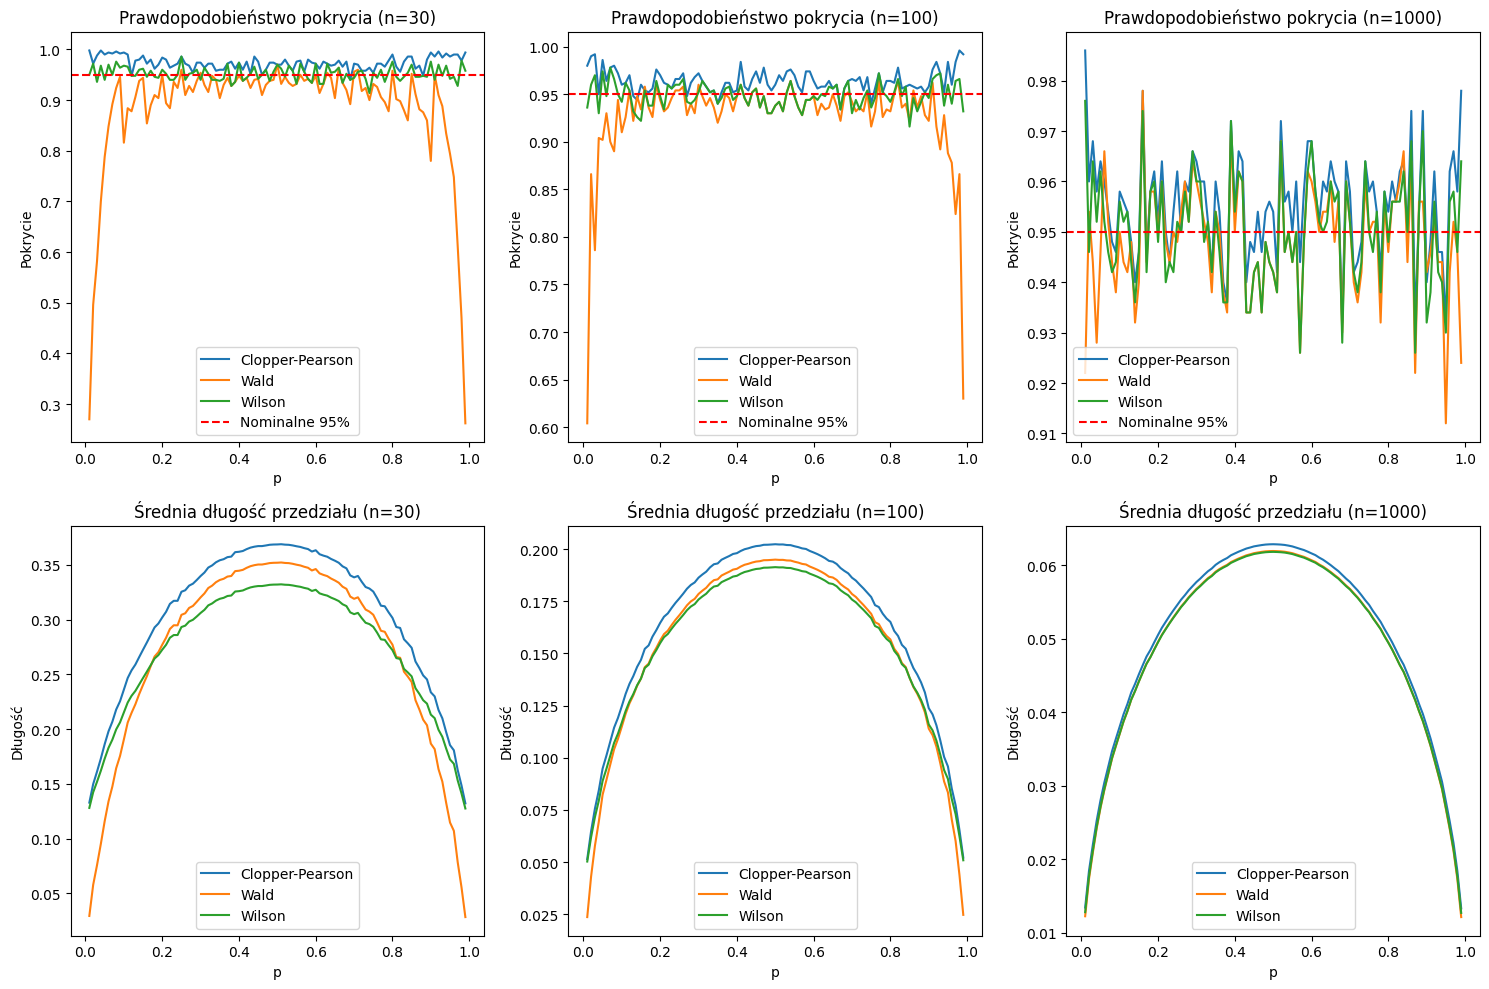

In [52]:
fig, axes = plt.subplots(2, len(n_values), figsize=(15, 10))
for idx, n in enumerate(n_values):
    for method in ["Clopper-Pearson", "Wald", "Wilson"]:
        axes[0, idx].plot(p_values, coverage_results[method][n], label=method)
        axes[1, idx].plot(p_values, avg_length_results[method][n], label=method)

    axes[0, idx].set_title(f'Prawdopodobieństwo pokrycia (n={n})')
    axes[0, idx].axhline(0.95, color='r', linestyle='--', label='Nominalne 95%')
    axes[0, idx].set_xlabel('p')
    axes[0, idx].set_ylabel('Pokrycie')
    axes[0, idx].legend()

    axes[1, idx].set_title(f'Średnia długość przedziału (n={n})')
    axes[1, idx].set_xlabel('p')
    axes[1, idx].set_ylabel('Długość')
    axes[1, idx].legend()

plt.tight_layout()
plt.show()

Dla prawdopodobieństwa pokrycia dla małych prób (n = 30) metoda Walda wypada najgorzej, często nie osiąga poziomu pokrycia 95%, szczególnie przy skrajnych wartościach p. Natomiast Clopper-Pearson zapewnia bardzo wysokie pokrycie, często przekraczające 95%, a metoda Wilsona z kolei zapewnia pokrycie bliskie 95%. Wraz ze wzrostem liczności próby metody się poprawiają, przy n=1000 metoda Walda zachouje się już podobnie do pozostałych metod. Jeśli chodzi o długość przedziałów, wraz ze zwiększającym się n metody osiągają bardzo bliskie wyniki, podczas gdy dla małego n matoda Walda mocno odstaje dla wartości krańcowych p. Wynika z tego że metoda Walda jest mało uniwersalna ze względu na średnie działanie dla krancowcyh wartosci p oraz małych prób, podczas gdy metoda Clopper-Pearson oraz Wilsona mogą zostać wykorzystane dowolnie w zależności od potrzeb związanych z długościami przedziały oraz prawdopodobieństwem pokrycia.

# Zadanie 10

In [53]:
n = 100
x = 60
p0 = 0.5

exact_test = stats.binomtest(x, n, p0, alternative='two-sided')
print(f"dla stats.binomtest p-wartość: {exact_test.pvalue}")

z_stat, p_value_ztest = smp.proportions_ztest(x, n, p0, alternative='two-sided')
print(f"Dla smp.proportions_ztest statystka z: {z_stat}")
print(f"p-wartość: {p_value_ztest}")

dla stats.binomtest p-wartość: 0.056887933640980784
Dla smp.proportions_ztest statystka z: 2.0412414523193148
p-wartość: 0.0412268333371637


```binomtest```
sprawdza, czy zaobserwowany odsetek sukcesów w próbie jest zgodny z założonym prawdopodobieństwem

k – liczba sukcesów (np. ile razy coś się udało),

n – liczba prób (np. ile razy coś testowano),

p – oczekiwane prawdopodobieństwo sukcesu (hipoteza zerowa),

alternative – 'two-sided', 'greater', 'less' (typ testu).

zwraca pvalue oraz proportion_ci (p wartość oraz przedział ufności)

```proportions_ztest```
test asymptotyczny, oparty na aproksymacji normalnej

count – liczba sukcesów (może być int lub lista, np. [30]),

nobs – liczba prób (np. [100]),

value – oczekiwane prawdopodobieństwo (hipoteza H₀),

alternative – 'two-sided', 'larger', 'smaller'.

zwraca statystykę z oraz p-wartość

# Zadanie 11

In [54]:
# hipoteza 1

In [55]:
n = len(df)
kobiety = (df["PŁEĆ"] == "K").sum()
exact_test = stats.binomtest(kobiety, n, 0.5, alternative='two-sided')
z_stat, p_value_ztest = smp.proportions_ztest(kobiety, n, 0.5, alternative='two-sided')
print("binom p-wartość:", exact_test.pvalue)
print("ztest p-wartość:", p_value_ztest)
# odrzucone h0

binom p-wartość: 4.9729734792135474e-05
ztest p-wartość: 1.8243011136745864e-05


Obie wartości są mniejsze nic 0.05 więc odrzucamy hipotezę zerową. Zatem udział kobiet w firmie różni się od 0.5, czyli jest ich mneij niż połowa (zgadza się to z analizą danych)

In [56]:
# hipoteza 2

In [57]:
szkolenia_ok = df["PYT_2"].isin([1, 2]).sum()
exact_test = stats.binomtest(szkolenia_ok, n, 0.7, alternative='greater')
z_stat, p_value_ztest = smp.proportions_ztest(szkolenia_ok, n, 0.7, alternative='larger')
print("binom p-wartość:", exact_test.pvalue)
print("Ztest p-wartość:", p_value_ztest)
# nieodrzucamy

binom p-wartość: 0.9999998489329133
Ztest p-wartość: 0.9999992713531224


Nie mamy podstaw do odrzucenia hipotezy zerowej, zatem możemy przyjąć, że prawdopodobieństwo, że pracownicy pozytywnie oceniają szkolenia jest równe bądz większe niż 0.7

In [58]:
# hipoteza 3

In [59]:
kobiety_kier = ((df["PŁEĆ"] == "K") & (df["CZY_KIER"] == "Tak")).sum()
mezczyzni_kier = ((df["PŁEĆ"] == "M") & (df["CZY_KIER"] == "Tak")).sum()
kobiety_n = (df["PŁEĆ"] == "K").sum()
mezczyzni_n = (df["PŁEĆ"] == "M").sum()
z_stat, p_value_ztest = smp.proportions_ztest([kobiety_kier, mezczyzni_kier], [kobiety_n, mezczyzni_n],alternative="two-sided")
print("mezczyzni kierownicy (odsetek): ",mezczyzni_kier/mezczyzni_n)
print("kobiety kierownicy (odsetek): ",kobiety_kier/kobiety_n)
print("Ztest p-wartość:", p_value_ztest)


mezczyzni kierownicy (odsetek):  0.14728682170542637
kobiety kierownicy (odsetek):  0.11267605633802817
Ztest p-wartość: 0.49309035250452393


Nie mamy podstaw do odrzucenia hipotezy zerowej, więc możemy przyjąć że podobna ilość kobiet i mężczyzn zajmuje stanowiska pracownicze

In [60]:
# hipoteza 4

In [61]:
kobiety_szkolenia = ((df["PŁEĆ"] == "K") & df["PYT_2"].isin([1, 2])).sum()
mezczyzni_szkolenia = ((df["PŁEĆ"] == "M") & df["PYT_2"].isin([1, 2])).sum()
z_stat, p_value_ztest = smp.proportions_ztest([kobiety_szkolenia, mezczyzni_szkolenia], [kobiety_n, mezczyzni_n],alternative="two-sided")
print("mezczyzni zadowoleni (odsetek): ",mezczyzni_szkolenia/mezczyzni_n)
print("kobiety zadowolone (odsetek): ",kobiety_szkolenia/kobiety_n)
print("Ztest p-wartość:", p_value_ztest)

mezczyzni zadowoleni (odsetek):  0.5426356589147286
kobiety zadowolone (odsetek):  0.5070422535211268
Ztest p-wartość: 0.6293763135675485


Nie ma podstaw do odrzucenia hipotezy zerowej, więc możemy założyć że kobiety i mężczyzni pdoobnie oceniają szkolenia

In [62]:
# hipoteza 5

In [63]:
kobiety_hr = ((df["PŁEĆ"] == "K") & (df["DZIAŁ"] == "HR")).sum()
mezczyzni_hr = ((df["PŁEĆ"] == "M") & (df["DZIAŁ"] == "HR")).sum()
z_stat, p_value_ztest = smp.proportions_ztest([kobiety_hr, mezczyzni_hr], [kobiety_n, mezczyzni_n],alternative="larger")
print("mezczyzni hr (odsetek): ",mezczyzni_hr/mezczyzni_n)
print("kobiety hr (odsetek): ",kobiety_hr/kobiety_n)
print("Ztest p-wartość:", p_value_ztest)

mezczyzni hr (odsetek):  0.20930232558139536
kobiety hr (odsetek):  0.056338028169014086
Ztest p-wartość: 0.9978835042003623


Nie ma podstaw do odrzucenia hipotezy zerowej, więc możemy przyjąć że kobiety pracują w HR z takim samym prawdopodobieństwem lub większym co mężczyźni

# Zadanie 12

In [64]:
def powertest(N=500, n=100, alpha=0.05, p_0=0.9):
    p_values_exact = []
    p_values_ztest = []

    p_range = np.linspace(0.01, 0.99, 99)
    power_exact = []
    power_ztest = []

    for p in tqdm(p_range, desc="Symulacje dla różnych p"):
        exact_rejections = 0
        ztest_rejections = 0

        for _ in range(N):
            sample = np.random.binomial(n, p)
            exact_test = stats.binomtest(sample, n, p_0, alternative='two-sided')
            z_stat, p_value_ztest = smp.proportions_ztest(count=sample, nobs=n, value=p_0, alternative='two-sided')

            if exact_test.pvalue <= alpha:
                exact_rejections += 1
            if p_value_ztest <= alpha:
                ztest_rejections += 1

        power_exact.append(exact_rejections / N)
        power_ztest.append(ztest_rejections / N)

    return p_range, power_exact, power_ztest


In [65]:
p_range, power_exact, power_ztest = powertest(n=50)

Symulacje dla różnych p:   0%|          | 0/99 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std
Symulacje dla różnych p: 100%|██████████| 99/99 [00:53<00:00,  1.84it/s]


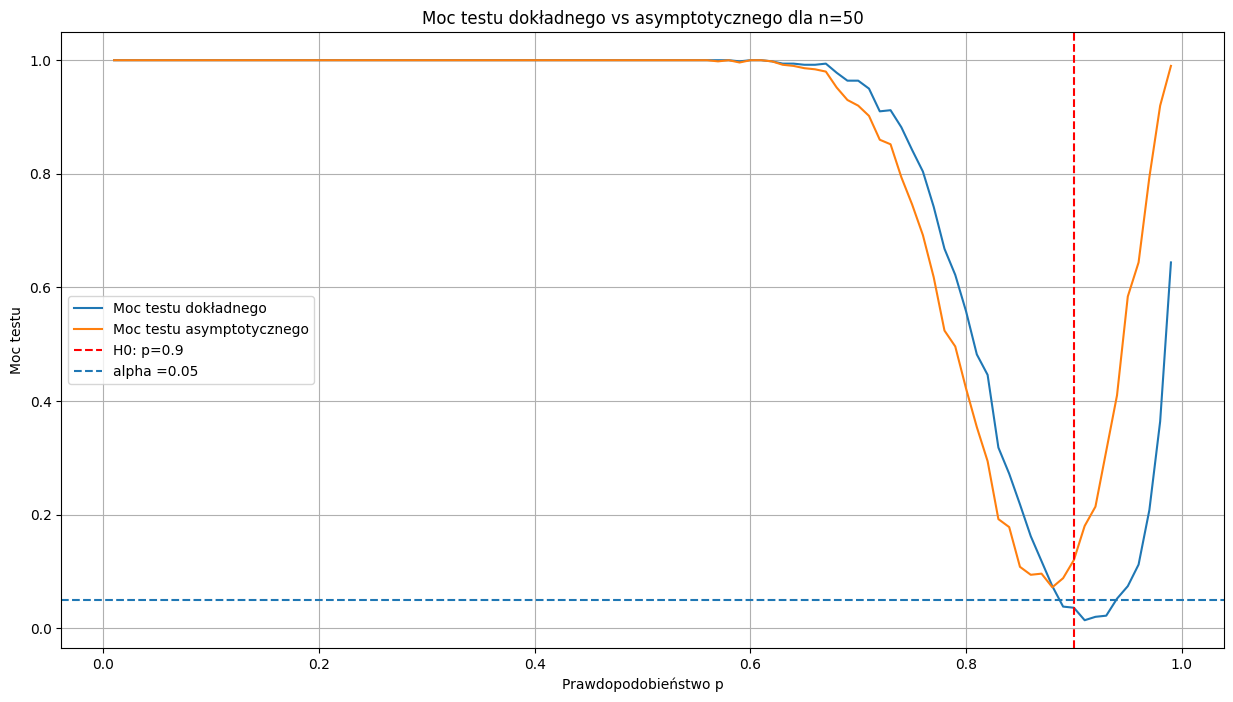

In [66]:
plt.figure(figsize=(15, 8))
plt.plot(p_range, power_exact, label='Moc testu dokładnego', linestyle='-', )
plt.plot(p_range, power_ztest, label='Moc testu asymptotycznego', linestyle='-', )
plt.axvline(x=0.9, color='r', linestyle='dashed', label='H0: p=0.9')
plt.axhline(y=0.05, linestyle='dashed', label='alpha =0.05')
plt.xlabel('Prawdopodobieństwo p')
plt.ylabel('Moc testu')
plt.title('Moc testu dokładnego vs asymptotycznego dla n=50')
plt.legend()
plt.grid()
plt.show()


In [67]:
p_range, power_exact, power_ztest = powertest(n=100)

Symulacje dla różnych p: 100%|██████████| 99/99 [01:00<00:00,  1.65it/s]


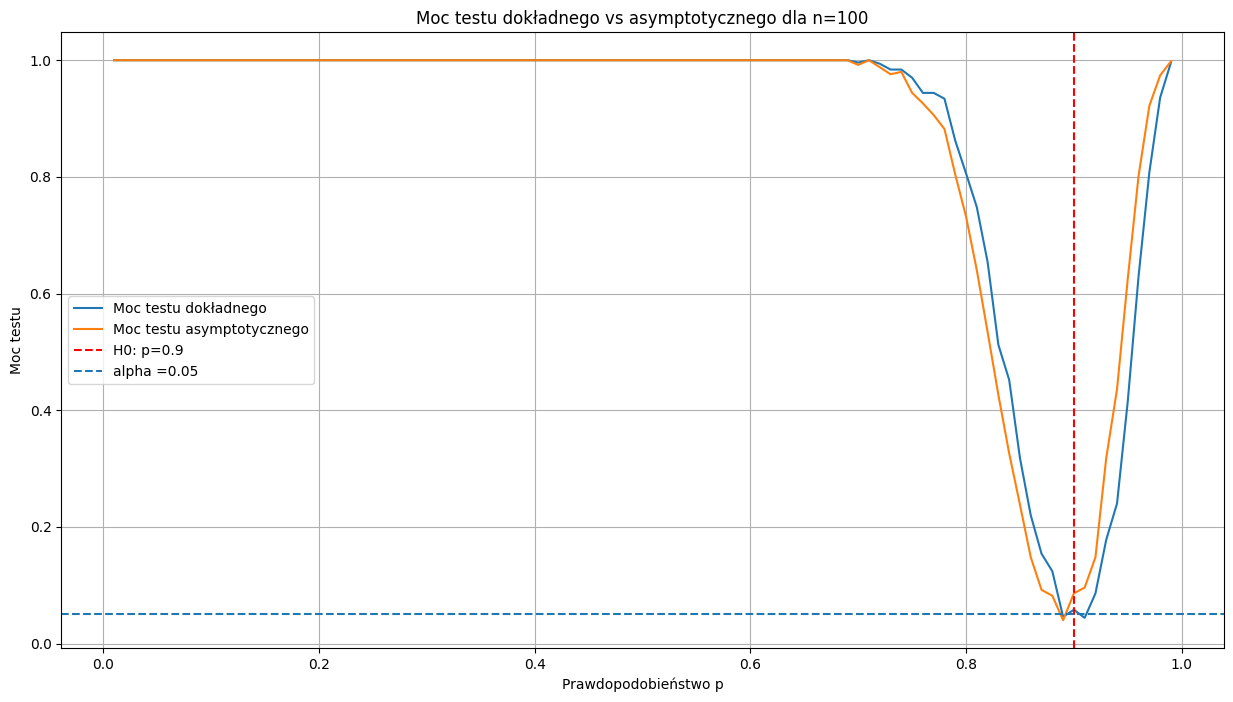

In [68]:
plt.figure(figsize=(15, 8))
plt.plot(p_range, power_exact, label='Moc testu dokładnego', linestyle='-', )
plt.plot(p_range, power_ztest, label='Moc testu asymptotycznego', linestyle='-', )
plt.axvline(x=0.9, color='r', linestyle='dashed', label='H0: p=0.9')
plt.axhline(y=0.05, linestyle='dashed', label='alpha =0.05')
plt.xlabel('Prawdopodobieństwo p')
plt.ylabel('Moc testu')
plt.title('Moc testu dokładnego vs asymptotycznego dla n=100')
plt.legend()
plt.grid()
plt.show()

In [69]:
p_range, power_exact, power_ztest = powertest(n=1000)

Symulacje dla różnych p: 100%|██████████| 99/99 [01:20<00:00,  1.23it/s]


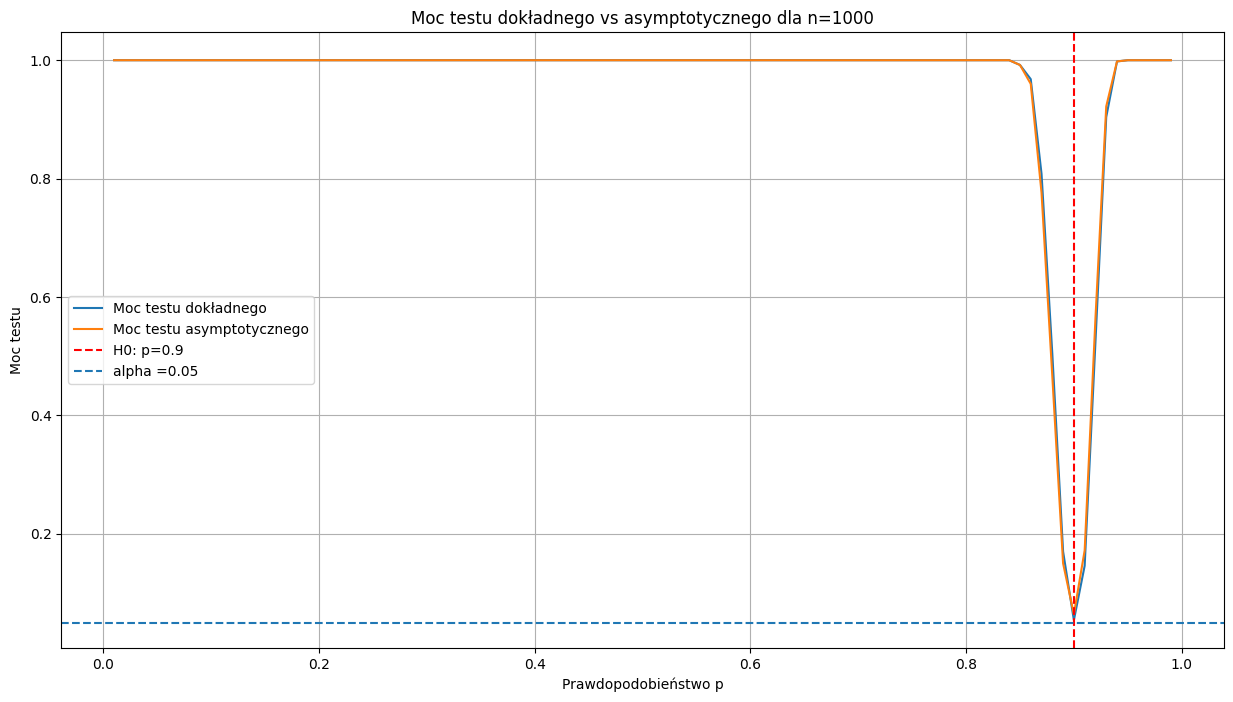

In [70]:
plt.figure(figsize=(15, 8))
plt.plot(p_range, power_exact, label='Moc testu dokładnego', linestyle='-', )
plt.plot(p_range, power_ztest, label='Moc testu asymptotycznego', linestyle='-', )
plt.axvline(x=0.9, color='r', linestyle='dashed', label='H0: p=0.9')
plt.axhline(y=0.05, linestyle='dashed', label='alpha =0.05')
plt.xlabel('Prawdopodobieństwo p')
plt.ylabel('Moc testu')
plt.title('Moc testu dokładnego vs asymptotycznego dla n=1000')
plt.legend()
plt.grid()
plt.show()

Dla małych n moc testu znaczaco się różni między testem dokładnym, a asymptotycznym i test asymptotyczny może być mało wiarygodny. Dla p=0.9 moc testu dokładnego spada poniżej 0.05, ale testu asymptotycznego już nie. Natomiast im większa jest próba, tym większą precyzją cecują się oba testy a także zanikają różnice między nimi. Przy dużym n obie metody zachowują się zgodnie z oczekiwaniami, czyli mają najmniejszą moc w okolicach 0.9 a bliską 1 dla wszystkich alternatywnych wartości.  